# importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading data

In [3]:
data = pd.read_csv("data_for_lr.csv")
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


# data preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
data = data.dropna()
print("shape of data is : ",data.shape)

shape of data is :  (699, 2)


# splitting data

In [7]:
# traning input and output
train_input = np.array(data['x'][0:500]).reshape(500, 1)
train_output = np.array(data['y'][0:500]).reshape(500, 1)

# validation data input and output
test_input = np.array(data['x'][500:700]).reshape(199, 1)
test_output = np.array(data['y'][500:699]).reshape(199, 1)

# <font color="green">Linear Regression</font>
## forward propogation
f(x) = mx + c

In [8]:
def forward_propogation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(train_input, m) + c
    
    return predictions

## cost function
summ(1/2n*(f(x)-y)^2)

In [9]:
def cost_function(predictions, train_output):
    
    cost = np.mean((predictions - train_output)**2)*0.5
    
    return cost

## Gradient Decent for Backwardpropagation
df = summ(f(x) - y)/n

dm = df*m

dc = df*1

In [10]:
def backward_propagation(train_input, train_output, predictions):
    
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_output))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## Update parameters
m = m - (learning_rate * dm)

c = c - (learning_rate * dc)

In [11]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - (learning_rate * derivatives['dm'])
    parameters['c'] = parameters['c'] - (learning_rate * derivatives['dc'])
    
    return parameters

## training

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0.1)
    
    plt.figure()
    loss = list()
    #iters
    for i in range(iters):
        
        #forward ppropagration
        predictions = forward_propogation(train_input, parameters)
        
        #cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"interations = {i+1}, loss = {loss}")
        
        #plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='original')
        ax.plot(train_input, predictions, '*', label='training')
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+', label='original')
        plt.plot(train_input, predictions, '*', label='training')
        plt.show()
        
        #back propagation
        derivaties = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivaties, learning_rate)
        
    return parameters, loss
    

# training

interations = 1, loss = [920.4508749660768]


<Figure size 640x480 with 0 Axes>

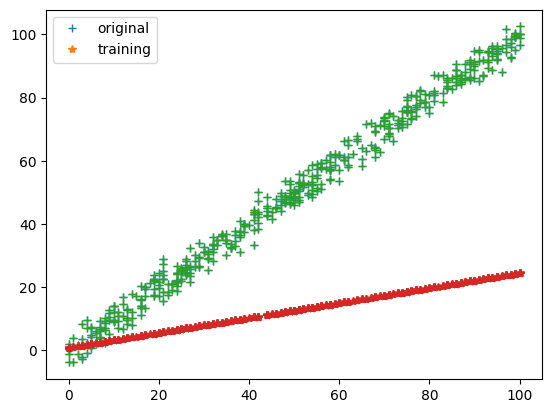

interations = 2, loss = [920.4508749660768, 419.5572475219724]


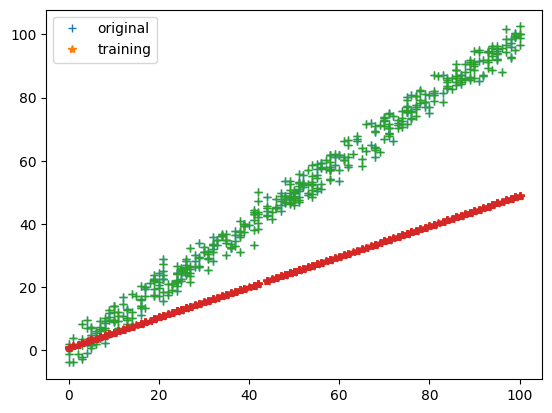

interations = 3, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912]


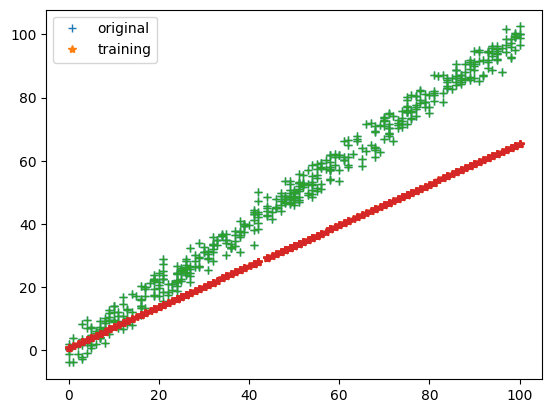

interations = 4, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739]


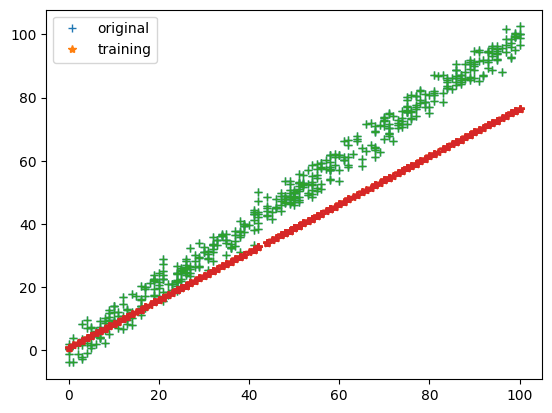

interations = 5, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576]


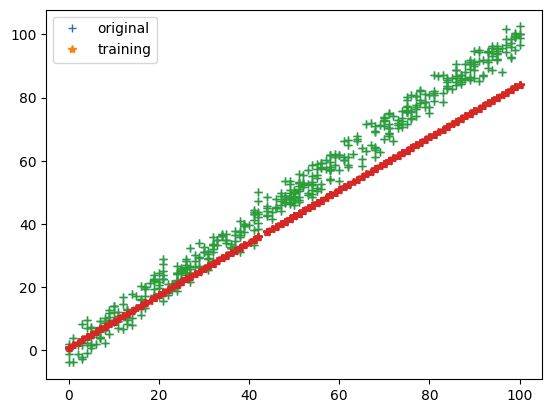

interations = 6, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366]


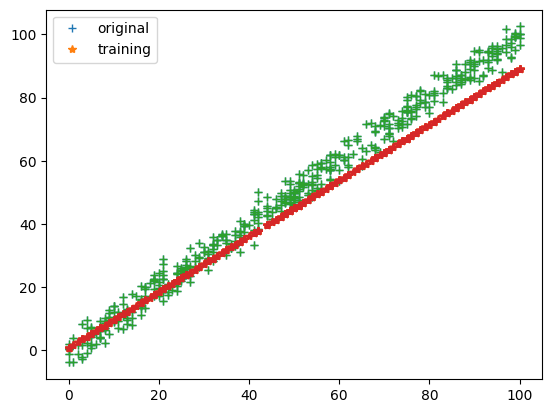

interations = 7, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171]


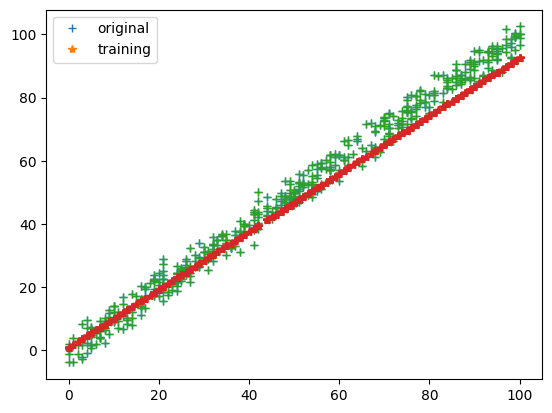

interations = 8, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981]


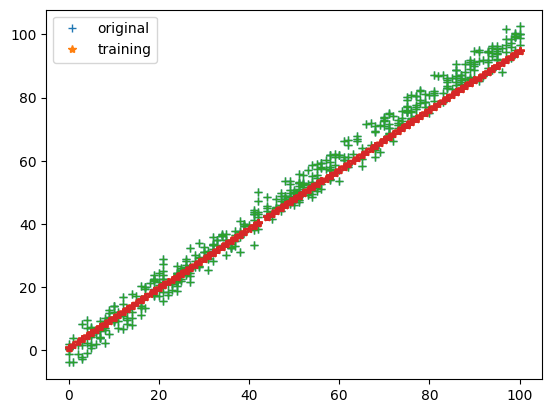

interations = 9, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632]


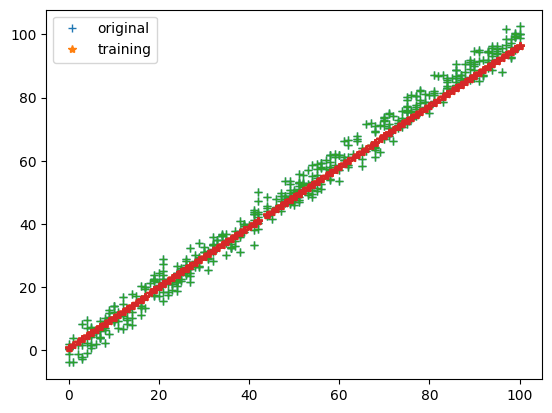

interations = 10, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436]


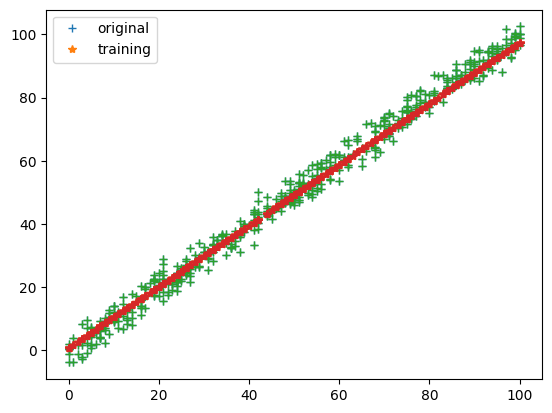

interations = 11, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675]


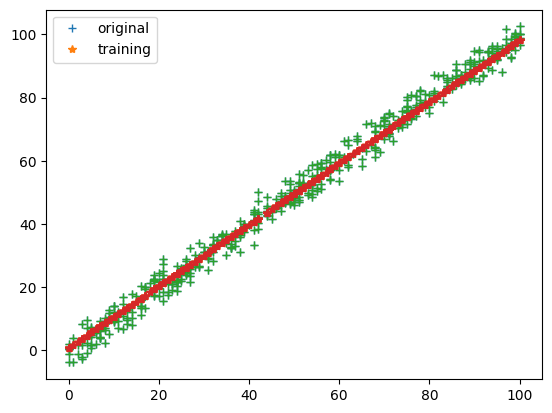

interations = 12, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675, 4.13358316359208]


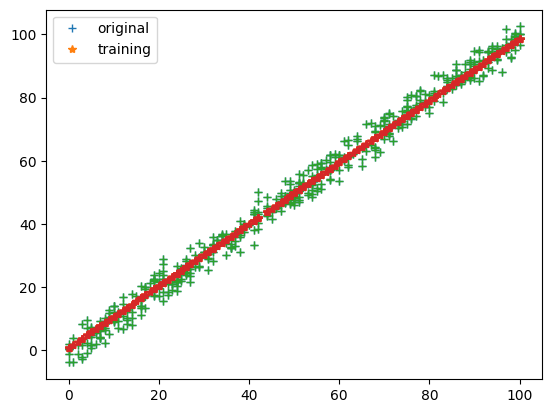

interations = 13, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675, 4.13358316359208, 4.0723047528716325]


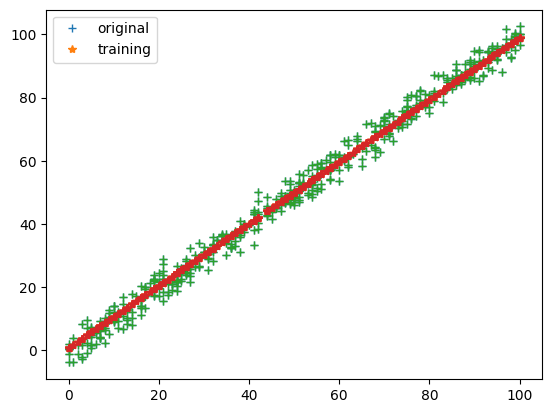

interations = 14, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675, 4.13358316359208, 4.0723047528716325, 4.050002460492922]


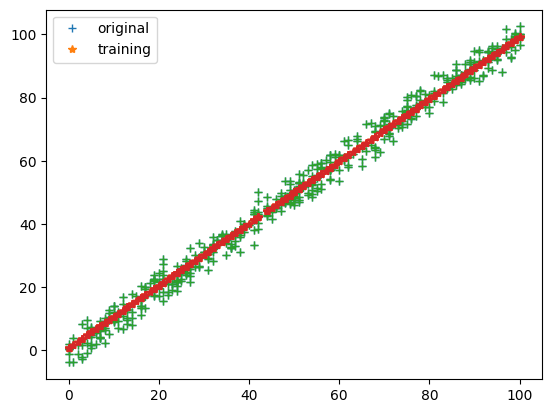

interations = 15, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675, 4.13358316359208, 4.0723047528716325, 4.050002460492922, 4.043612829763378]


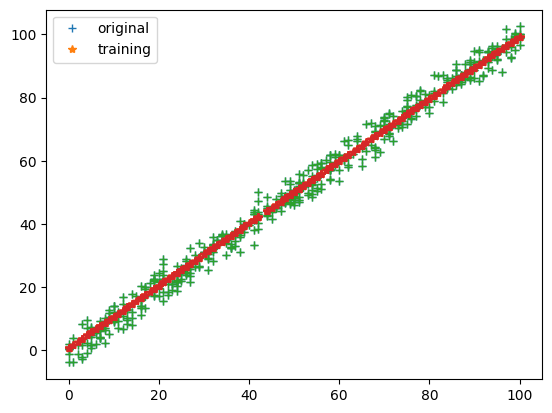

interations = 16, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675, 4.13358316359208, 4.0723047528716325, 4.050002460492922, 4.043612829763378, 4.043236759941887]


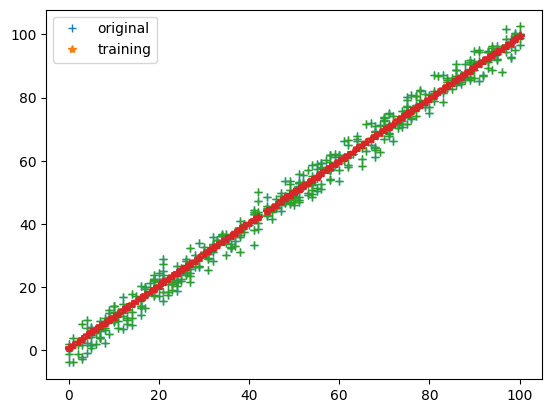

interations = 17, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675, 4.13358316359208, 4.0723047528716325, 4.050002460492922, 4.043612829763378, 4.043236759941887, 4.044770342015072]


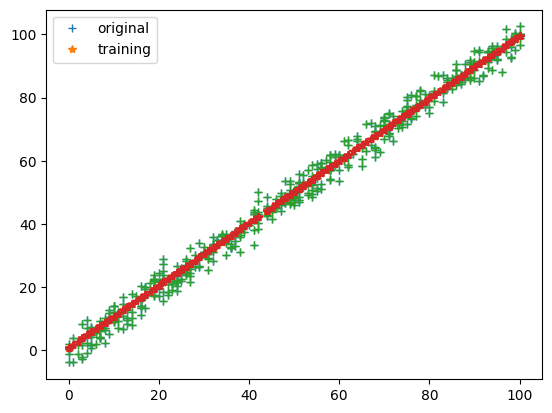

interations = 18, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675, 4.13358316359208, 4.0723047528716325, 4.050002460492922, 4.043612829763378, 4.043236759941887, 4.044770342015072, 4.046615757633072]


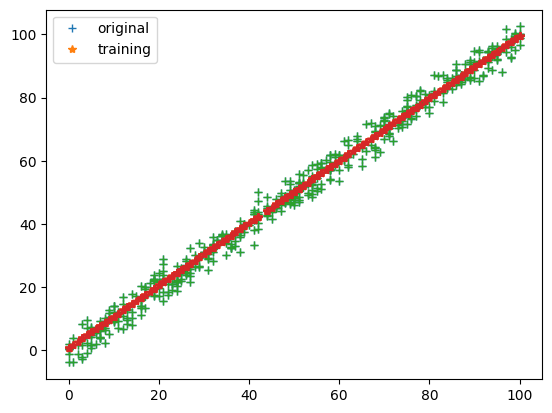

interations = 19, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675, 4.13358316359208, 4.0723047528716325, 4.050002460492922, 4.043612829763378, 4.043236759941887, 4.044770342015072, 4.046615757633072, 4.048227532504237]


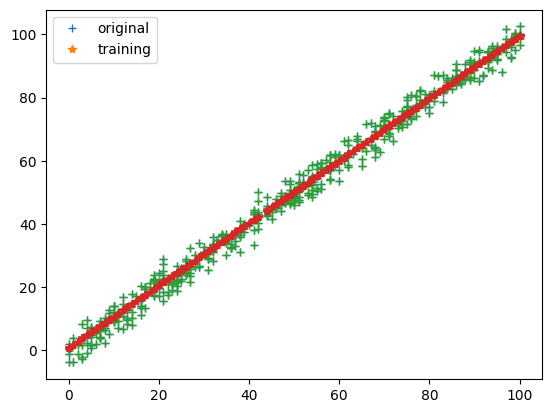

interations = 20, loss = [920.4508749660768, 419.5572475219724, 192.15857610197912, 89.01637243472739, 42.296956322762576, 21.17764200220366, 11.659707188880171, 7.389869163663981, 5.487753114573632, 4.649547839961436, 4.286471610647675, 4.13358316359208, 4.0723047528716325, 4.050002460492922, 4.043612829763378, 4.043236759941887, 4.044770342015072, 4.046615757633072, 4.048227532504237, 4.049479815666581]


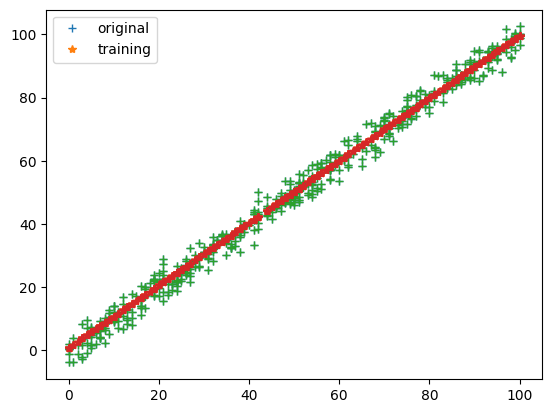

In [16]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [17]:
parameters['m']
parameters['c']

0.7899753598532342

## Lets Predict 

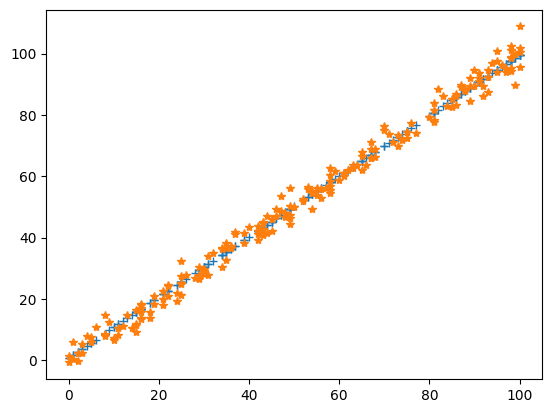

In [24]:
test_predictions = test_input * parameters['m'] + parameters['c']
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, "*")
plt.show()

In [26]:
# calculate cost 
cost_function(test_predictions, test_output)
# it means we have +-3 of loss from actual data

3.996513774490646